#### TD Ameritrade Bot

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import keyring
from yahoo_fin import stock_info as si
import pyotp
from datetime import datetime

#import trend model functions
from trendmodel import *

# import td ameritrade functions
import robin_stocks.tda as tda

In [2]:
# first time login td ameritrade
encryption_passcode = tda.authentication.generate_encryption_passcode()
client_id = 'YLY1MTJDBHIMJW9UCBUNHR3TGGUNXUUF'
authorization_token = 'c9MA9hdQ4v4lglsP469ET2Y3wpwZmj6mOPWRYwziR5y5j18q7QcK6esQpO4eWwRu/Ds61dBoXbkEcjdTe5Eu0XjZrm8W9INVNwzn14PES1ccI8nvK0M0aTwpVru2dx9KZ9uUShUn5PLx7QEEmJaLVtxXjE3yoC5vFpZ3SPF0gY254NbS00fpGJa3ewkNLusDDxjLg/K1fZzEnO8Ariulrznykx2AJd5insXeygxfUtxzQd+r5gvVYFWx2Jsdl2/K7hwzX7pWQk2OPD8K4GvvvdF6Zt8xOsTsF+t2eZUuqFC8OJ4DU+jnCCxiOLEQ091P/jwSGPrX90vMWXf7KTlj2H8Qrv9rnSkVvP0+ki0799j6PV2cPk6+dhI7UY1Oph7WBkUcHGcH09Gd/1Z0TsTdMlltctzEo9Sio92gpt74D2/boKSf4rE2tPBW/Mf7WIUNjQvscfscZT5yW660uQGNDzgyv3c+Opccxi9LEqIEL+wvvfOimQxGxxTIWcUW5quankefr9aF0yfRj6fMdqq3ztsO+SSY8vM8DUNHsYCtbr01YOs5CvjfDm/hhAi100MQuG4LYrgoVi/JHHvlZPElNVlPMVnTTQb+41rFpW5jkqzulLrhJJsSoirgms6GQJF9x77o9vLPny6NQqtXNGMOSlUAYZhl4yTy75zvbn5sKhJclWhQJ2HkzZTk2CVX8KrneS82jnVM5O8lCQqlT9avacSmKoeNyqnBcsNbf9+dzT5xb/pXJAxX0nO3utqlfjDMJzpsvWVtcFHht6Lvw57Cf5Hs0kAd3eUh1GSv76WLJIXzcM52Ko6daJJbc0zc/pAI9WVt0GtnL2GhU6rIng7wzlccicDEUj7qGSGjtWFJMbVnI0zxpgjx5+eQcssZhk36B+ADcRnbzIY73RYpsQoByNrPuf29BSijdODUHN8nvskrB8+rAXO/+Zij5jVufirPUPBuDJl2uDRjU/gmEyBA/jnQIJj2Bs1FHuc25gTz/pIKkcEg1PnWJV+ZJW2pJKf33w+p4kXBI9oqRvVa8DLXyDnLlS5AGCv/wO/u/EyNuiC4M+L2p1iHU+puvg9QaxGM9152gra6Cp/8j226WZLfcXFcACPwVTpDzpNMQfZ81Ufa1xjd66IDeViUvgrITo8dCs0jbhFwH/s=212FD3x19z9sWBHDJACbC00B75E'
refresh_token = 'GbmuL9DhLF6e6jq43Jwc5QocoQj/CXk7F57mq5Bn4HtoAJbCxKnD2N4eS7IXqc51wRJ11C9pM/LCd81F1A+k5bK9TT3Wxs6+jY1VXflrMxbSOc0FZbv6lk4O7p63qFvyxJ+Obgl55HFLp3BoCMMEJuxsjJ9TOSTlPkU/UryW+h+dzLUrk24jEEW+o6Vx85tsb3baUZFE5RHZCqDWrne5wdiV5j/HmaUsC6S8ZrLFb3AIo5P9bzOOcqelzJCe0RjAqIPoxARtwhstki4YidJ3NjOpp4BTijr0C3ukeuuYCMVahufRIDbunAaPei3wbBMc0ryEKbp8Fwm5BgqMftZPSFBiklQqwkwqQOLqWITzjQgZQVGafhPfcyGIAZweI1Hip9c9SFHMy6R+jfvg1yE8PTHS/0Zk3bQoCebzPXqjTHTWgCR1abxXXGD3ZcT100MQuG4LYrgoVi/JHHvl2kCPjBRuUiuUBqAq3iCDumRdkuiEoYHMksOITj+Bnn3G7XwtFrpJ0tEKfsc+Lj4enqG9m2cK6XIcCt8lAje3Tj7E3/htLNp2xqcu2RBKG5WzeR5je6N2olcpGeyuEqGcaUotXM7sB230Y1U+udR87jkS+KTI4I1BYC5tVML6l+kjZJUnqwrJPqgyapFYpdkAOEiaCLo+z8FqrA7whIYOV8Xnon1hxDNGOj047jcPfG5K1fszytsEBVXRRRMGUToOxaTpHid+2RkgPqOmukbkaYd+h3xbsL6ARd3a+F/f3v/bq+rGY83KCXFBJfmJ3xf88djRG75N4npgqdMtGS+r4GT1kleftpnQu2NnvwJeaXibdsQ4MTHRxhp6UNw8TXdZwRcMamdB3Hc9Z2jiNwUuuOlAbX0HRo6pGtuNLtkO+P2maTayjiE+een+XRM=212FD3x19z9sWBHDJACbC00B75E'
tda.authentication.login_first_time(encryption_passcode, client_id, authorization_token, refresh_token)

In [3]:
# connect to td ameritrade account
td_login = tda.authentication.login(encryption_passcode)

analyzing COIN


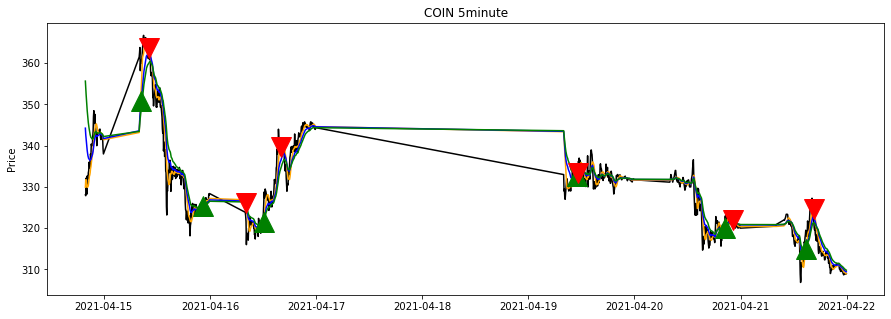

,High,Low,Open,Close,Volume,Adj Close,signal
Date,,,,,,,
2021-04-21 23:35:00,309.0001,308.80,309.00,308.80,1553.0,308.80,0.0
2021-04-21 23:40:00,310.0000,308.89,309.25,308.89,3003.0,308.89,0.0
2021-04-21 23:45:00,309.0100,308.86,308.90,309.00,860.0,309.00,0.0
2021-04-21 23:50:00,309.0000,308.88,308.88,309.00,1492.0,309.00,0.0
2021-04-21 23:55:00,309.3900,308.88,309.00,308.95,7468.0,308.95,0.0


In [4]:
# override watchlist symbols for individual stocks on demand
symbols = ['COIN']

# set duration
intervals = ['5minute'] # valid intervals are ‘5minute’, ‘10minute’, ‘hour’, ‘day’, ‘week’. Default is ‘hour’.

results = process_symbols(symbols, intervals, source = "tda")

In [ ]:
# get robinhood symbols
symbols = pd.DataFrame(r.account.get_watchlist_by_name("Stockbot")['results'])['symbol']

# override watchlist symbols for individual stocks on demand
symbols = ['COIN']

# set duration
intervals = ['5minute','10minute'] # valid intervals are ‘5minute’, ‘10minute’, ‘hour’, ‘day’, ‘week’. Default is ‘hour’.

results = process_symbols(symbols, intervals, source = "robinhood")
    
results_df = pd.DataFrame(results,columns=['symbol','interval','return','action'])

outputs = [] # list to hold output dataframes for each interval

for interval in intervals:
    output_df = results_df[results_df['interval'] == interval]
    output_df = output_df.sort_values(by=['symbol'])
    outputs.append(output_df)       
    
for output in outputs:
    display(output)

In [ ]:
# set buys for opening
buys = ['CPRX','PLTR','TSLA','UPWK']

# set total amount to invest
capital = 10000

# set list for order prices
current_prices = []
stop_prices = []
value = []
shares = []

for symbol in buys:
    current_price = r.stocks.get_latest_price(symbol)[0]
    stop_price = float(current_price) * .99
    equity = float(capital/len(buys))
    num_shares = int(equity/float(current_price))
    
    current_prices.append(current_price)
    stop_prices.append(stop_price)
    
    value.append(round(int(num_shares)*float(current_price),2))
    shares.append(num_shares)

buys_df = pd.DataFrame(buys, columns=['symbol'])
buys_df['current_price'] = current_prices
buys_df['stop_price'] = stop_prices
buys_df['value'] = value
buys_df['shares'] = shares
    
display(buys_df)


#### Opening Buy Orders

In [ ]:
live = False

# if not open order, place order
for row in buys_df.iterrows():
    stock = row[1]['symbol']
    shares = row[1]['shares']
    price = row[1]['current_price']
    value = shares*price
    
    if(live):
        r.order_buy_limit(stock,shares,price)

In [ ]:
# show open orders
open_orders = r.get_all_open_stock_orders()

if (open_orders):
    open_order_df = pd.DataFrame()
    open_order_df[['price','stop_price','quantity','extended_hours','type','side','time_in_force']]

#### Stop Loss Orders

In [ ]:
# TODO

#### Portfolio Stocks

In [ ]:
def get_symbol_robinhood_url(url):
    return r.account.get_symbol_by_url(url)

# get portfolio positions
positions = pd.DataFrame(r.account.get_open_stock_positions())

# get portfolio symbols
positions['symbol'] = positions['instrument'].apply(get_symbol_robinhood_url)
symbols = positions['symbol'].values

print(symbols)

# set duration
intervals = ["day","5minute"] # valid intervals are ‘5minute’, ‘10minute’, ‘hour’, ‘day’, ‘week’. Default is ‘hour’.

results = process_symbols(symbols, intervals, source = "robinhood")
    
results_df = pd.DataFrame(results,columns=['symbol','interval','return','action'])

outputs = [] # list to hold output dataframes for each interval

for interval in intervals:
    output_df = results_df[results_df['interval'] == interval]
    output_df = output_df.sort_values(by=['symbol'])
    outputs.append(output_df)       
    
for output in outputs:
    display(output)